In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
%matplotlib inline

In [2]:
df=pd.read_csv('diabetes.csv')

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [6]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [7]:
df.shape

(768, 9)

In [8]:
df.isna().sum().sum()

0

In [9]:
df.Outcome.value_counts()

0    500
1    268
Name: Outcome, dtype: int64

In [10]:
diabetes_true_count = len(df.loc[df['Outcome'] == True])
diabetes_false_count = len(df.loc[df['Outcome'] == False])

In [ ]:
diabetes_true_count,diabetes_false_count

(268, 500)

<AxesSubplot:>

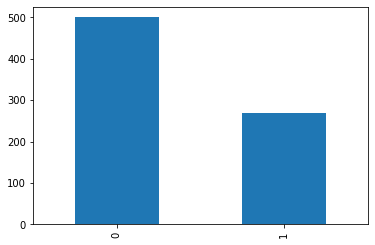

In [ ]:
df.Outcome.value_counts().plot(kind='bar')

In [ ]:
df.corr()[['Outcome']]

,Outcome
Pregnancies,0.221898
Glucose,0.466581
BloodPressure,0.065068
SkinThickness,0.074752
Insulin,0.130548
BMI,0.292695
DiabetesPedigreeFunction,0.173844
Age,0.238356
Outcome,1.000000


<AxesSubplot:>

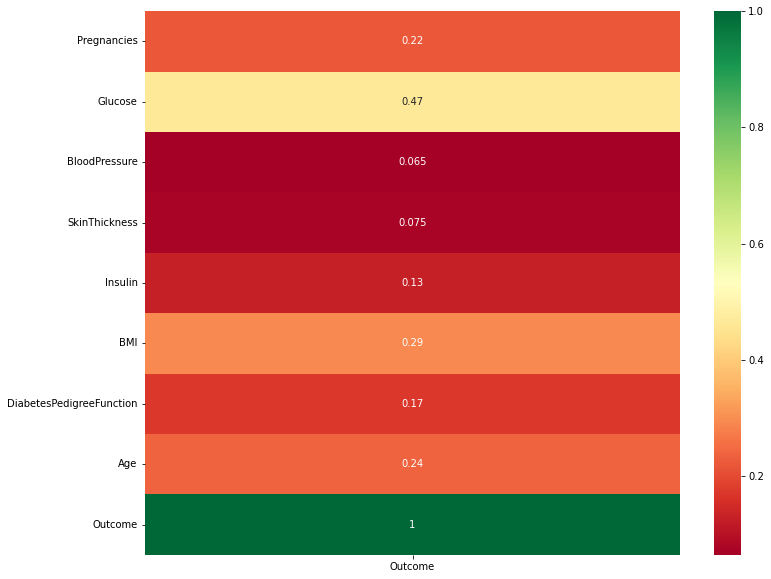

In [ ]:
plt.figure(figsize=(12,10))
sns.heatmap(df.corr()[['Outcome']], annot=True,cmap ='RdYlGn')

In [ ]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

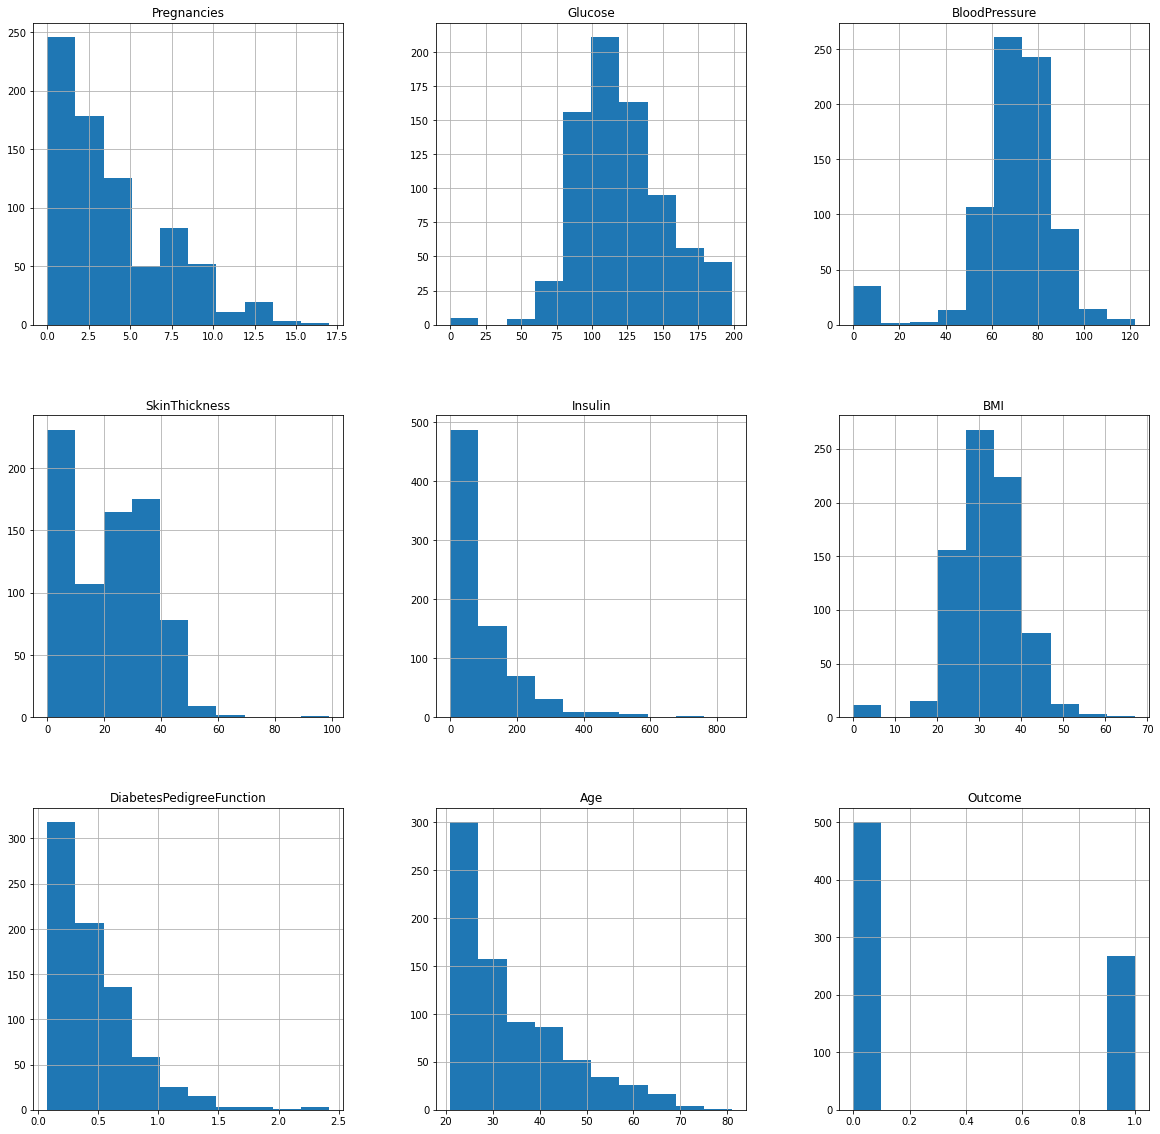

In [ ]:
df.hist(figsize =(20,20))

check meaningless values

In [ ]:

try:
    print(f'the number of 0 values in {df.columns[1]} is {df[df.columns[1]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[1]} is 0')
try:
    print(f'the number of 0 values in {df.columns[2]} is {df[df.columns[2]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[2]} is 0')
try:
    print(f'the number of 0 values in {df.columns[3]} is {df[df.columns[3]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[3]} is 0')
try:
    print(f'the number of 0 values in {df.columns[4]} is {df[df.columns[4]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[4]} is 0')
try:
    print(f'the number of 0 values in {df.columns[5]} is {df[df.columns[5]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[5]} is 0')
try:
    print(f'the number of 0 values in {df.columns[6]} is {df[df.columns[6]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[6]} is 0')
try:
    print(f'the number of 0 values in {df.columns[7]} is {df[df.columns[7]].value_counts()[0]}')
except:
    print(f'the number of 0 values in {df.columns[7]} is 0')

the number of 0 values in Glucose is 5
the number of 0 values in BloodPressure is 35
the number of 0 values in SkinThickness is 227
the number of 0 values in Insulin is 374
the number of 0 values in BMI is 11
the number of 0 values in DiabetesPedigreeFunction is 0
the number of 0 values in Age is 0


In [ ]:
df['Insulin'].replace(0,df['Insulin'].mean(),inplace=True)
df['Glucose'].replace(0,df['Glucose'].mean(),inplace=True)
df['BloodPressure'].replace(0,df['BloodPressure'].mean(),inplace=True)
df['SkinThickness'].replace(0,df['SkinThickness'].mean(),inplace=True)
df['BMI'].replace(0,df['BMI'].mean(),inplace=True)
df['DiabetesPedigreeFunction'].replace(0,df['DiabetesPedigreeFunction'].mean(),inplace=True)

In [ ]:
X=df.drop('Outcome',axis=1)
Y=df[['Outcome']]

In [ ]:
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=0)

In [ ]:
classifier=RandomForestClassifier(n_estimators=6,criterion='entropy',random_state=0)

In [ ]:
classifier.fit(X_train,y_train)

C:\Users\user\AppData\Local\Temp\ipykernel_10796\500067374.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  classifier.fit(X_train,y_train)


RandomForestClassifier(criterion='entropy', n_estimators=6, random_state=0)

In [ ]:
y_pred=classifier.predict(X_test)

In [ ]:
y_model_train = classifier.predict(X_train)
print("Accuracy_Score =", format(metrics.accuracy_score(y_model_train,y_train)))

Accuracy_Score = 0.9674267100977199


In [ ]:
print("Accuracy_Score =", format(metrics.accuracy_score(y_test,y_pred)))

Accuracy_Score = 0.7662337662337663


In [ ]:
# grinning face
print(["\U0001f600" for i in range(10)])

['😀', '😀', '😀', '😀', '😀', '😀', '😀', '😀', '😀', '😀']
